In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
x = tf.placeholder(tf.float32, [None, 784])
encode_1 = tf.contrib.layers.fully_connected(x, 256, activation_fn=tf.nn.sigmoid)
encode = tf.contrib.layers.fully_connected(encode_1, 2, activation_fn=tf.nn.sigmoid)
decode_1 = tf.contrib.layers.fully_connected(encode, 256, activation_fn=tf.nn.sigmoid)
decode = tf.contrib.layers.fully_connected(decode_1, 784, activation_fn=tf.nn.sigmoid)

y = tf.placeholder(tf.float32, [None, 784])
loss = tf.reduce_mean(tf.square(y - decode))
trainer = tf.train.AdamOptimizer(0.1).minimize(loss)

In [18]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
img = None
ls = 1
episode = 0
# for episode in range(10000):
while ls > 0.1:
    episode += 1
    xs, ys = mnist.train.next_batch(100)
    img = xs[0]
    _, ls = sess.run([trainer, loss], feed_dict={x: xs, y: xs})
    if episode%500 == 0:
        print(episode, ls)
    

500 0.111589
1000 0.112615
1500 0.119901
2000 0.117439
2500 0.118163
3000 0.120989
3500 0.116299
4000 0.110591
4500 0.115941
5000 0.119187
5500 0.113865
6000 0.11615
6500 0.116868
7000 0.115044
7500 0.114021
8000 0.118146
8500 0.120213
9000 0.114639
9500 0.121362
10000 0.112269
10500 0.115716
11000 0.107443
11500 0.112546


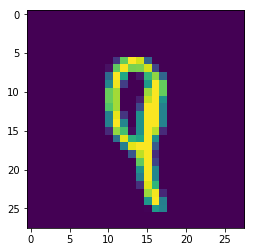

In [19]:
xs, ys = mnist.train.next_batch(1)
img = xs[0].reshape((28, 28))
plt.imshow(img)
# print(xs.reshape(28,28))

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


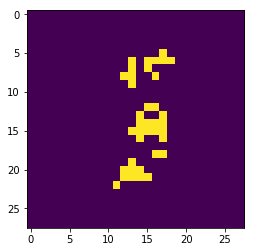

In [23]:
xs, ys = mnist.train.next_batch(1)
print(ys)
e, d  = sess.run([encode, decode], feed_dict={x: xs})
img = d[0].reshape((28, 28))
plt.imshow(img)

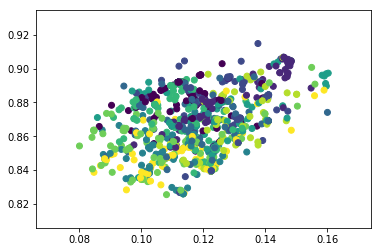

In [6]:
xs, ys = mnist.test.next_batch(1000)
e, d  = sess.run([encode, decode], feed_dict={x: xs})
x_ = e[:, 0]
y_ = e[:, 1]
c_ = np.argmax(ys, axis=1)
plt.scatter(x_, y_, c=c_)